# Unemployment Analysis In India

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load the dataset

df = pd.read_excel("Unemployment in India.xlsx")

In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


# Dataset Info
# Checking information about the dataset using info


df.info()



# 2. Dataset Duplicate Value Count


In [9]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')
     

number of duplicated rows are 13


2. Understanding The Variables

In [11]:
# Dataset Columns
df.columns
     

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [12]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)
     

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,1,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,740,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())
     

No. of unique values in Region is 28
No. of unique values in Date is 14
No. of unique values in Frequency is 1
No. of unique values in Estimated Unemployment Rate (%) is 624
No. of unique values in Estimated Employed is 740
No. of unique values in Estimated Labour Participation Rate (%) is 626
No. of unique values in Area is 2


# 3. Data Wrangling

In [14]:
# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']
     

In [15]:
# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Region'] = df['Region'].astype('category')
     

In [16]:

# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [17]:
# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()
     

In [18]:
# Drop all the missing values from 'df' dataset
df=df.dropna()

In [19]:
# Drop the 'Month' column from the DataFrame
df.drop(columns='Month', inplace=True)
     


In [21]:
 #Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date'] >= '2019-05-21') & (df['Date'] <= '2020-06-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]
     

In [22]:
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]
     

# Region wise estimation of unemployment

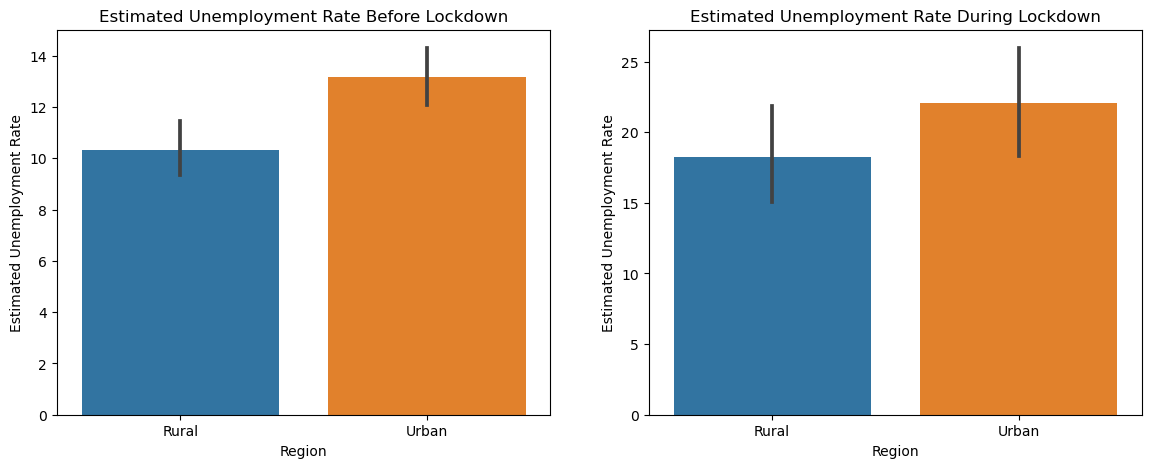

In [23]:
# Chart - 1 Bar plot visualization code for Region wise Estimated Unemployment Rate before and during lockdown

# Create a figure with two subplots side by side.
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)

# Set labels and title for the first subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld)

# Set labels and title for the second subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

# Display the subplots side by side.
plt.show()
     

# Chart - 2 : Swarm Plot for State Wise Estimated Unemployment Rate

In [ ]:
# Chart - 2 Swarm plot visualization code for State Wise Estimated Unemployment Rate before and during lockdown.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate before lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=8)

# Set labels for the first subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Subplot 2: State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate during lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=8)

# Set labels for the second subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Display the subplots side by side.
plt.show()

# Chart - 3 : Bar Plot for State Wise Estimated Unemployment Rate

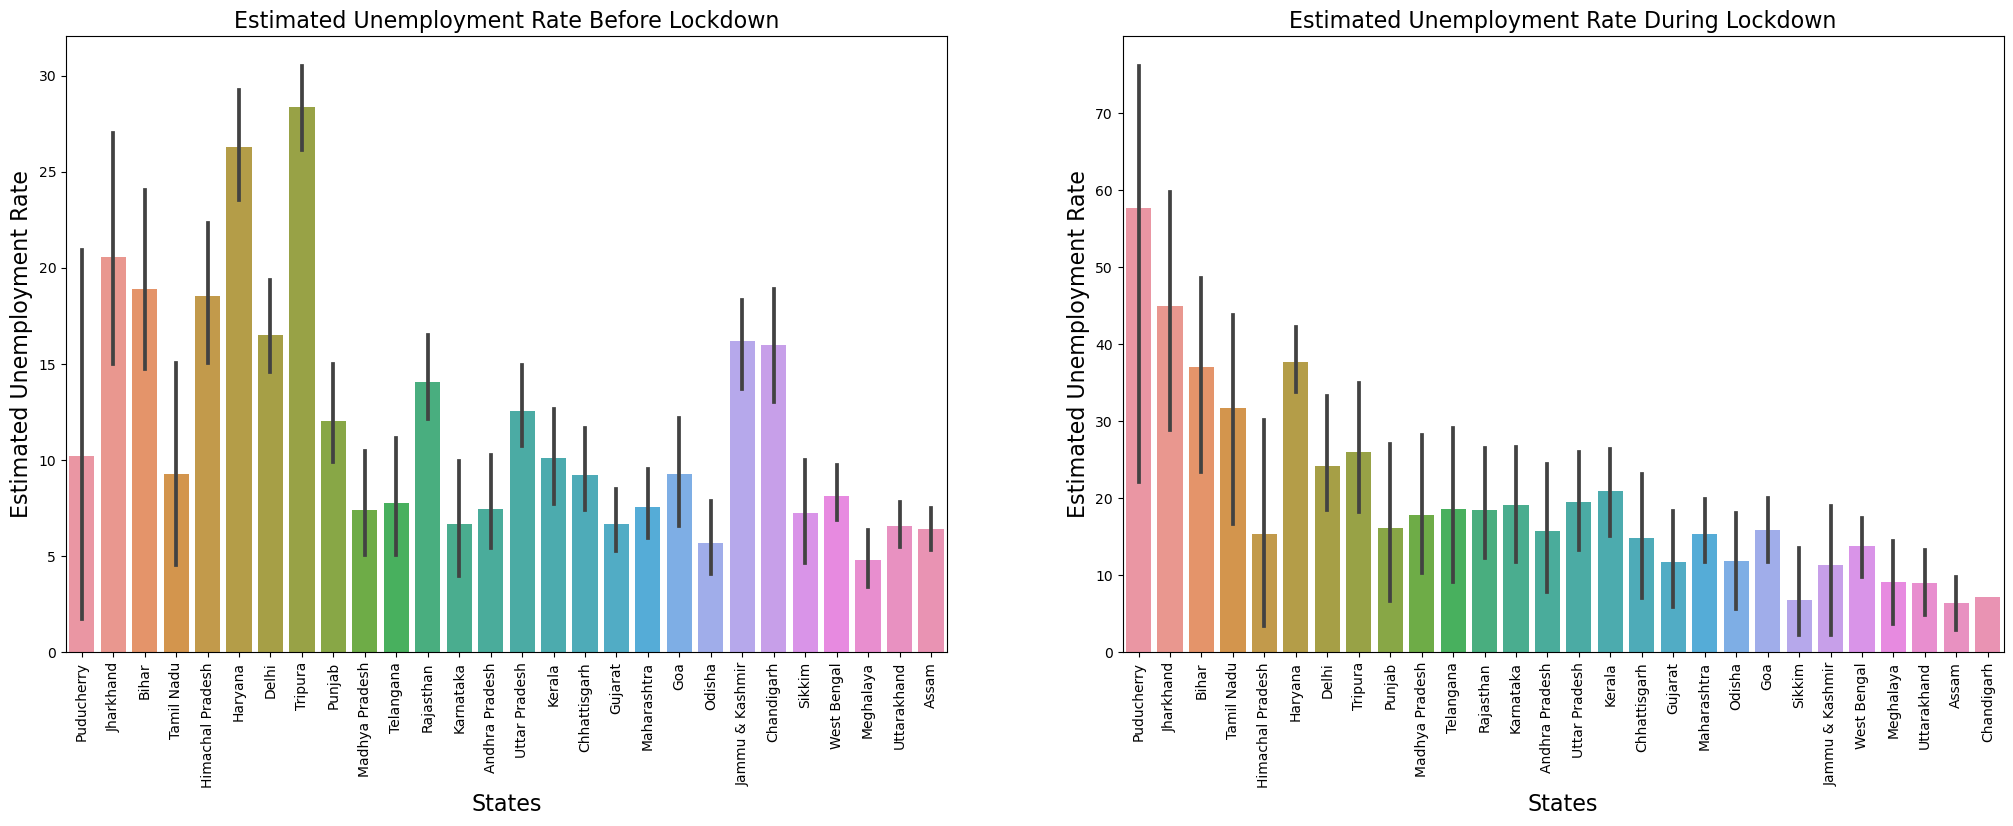

In [25]:
# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

# Chart - 4 : State Wise Estimated Employed Workforce

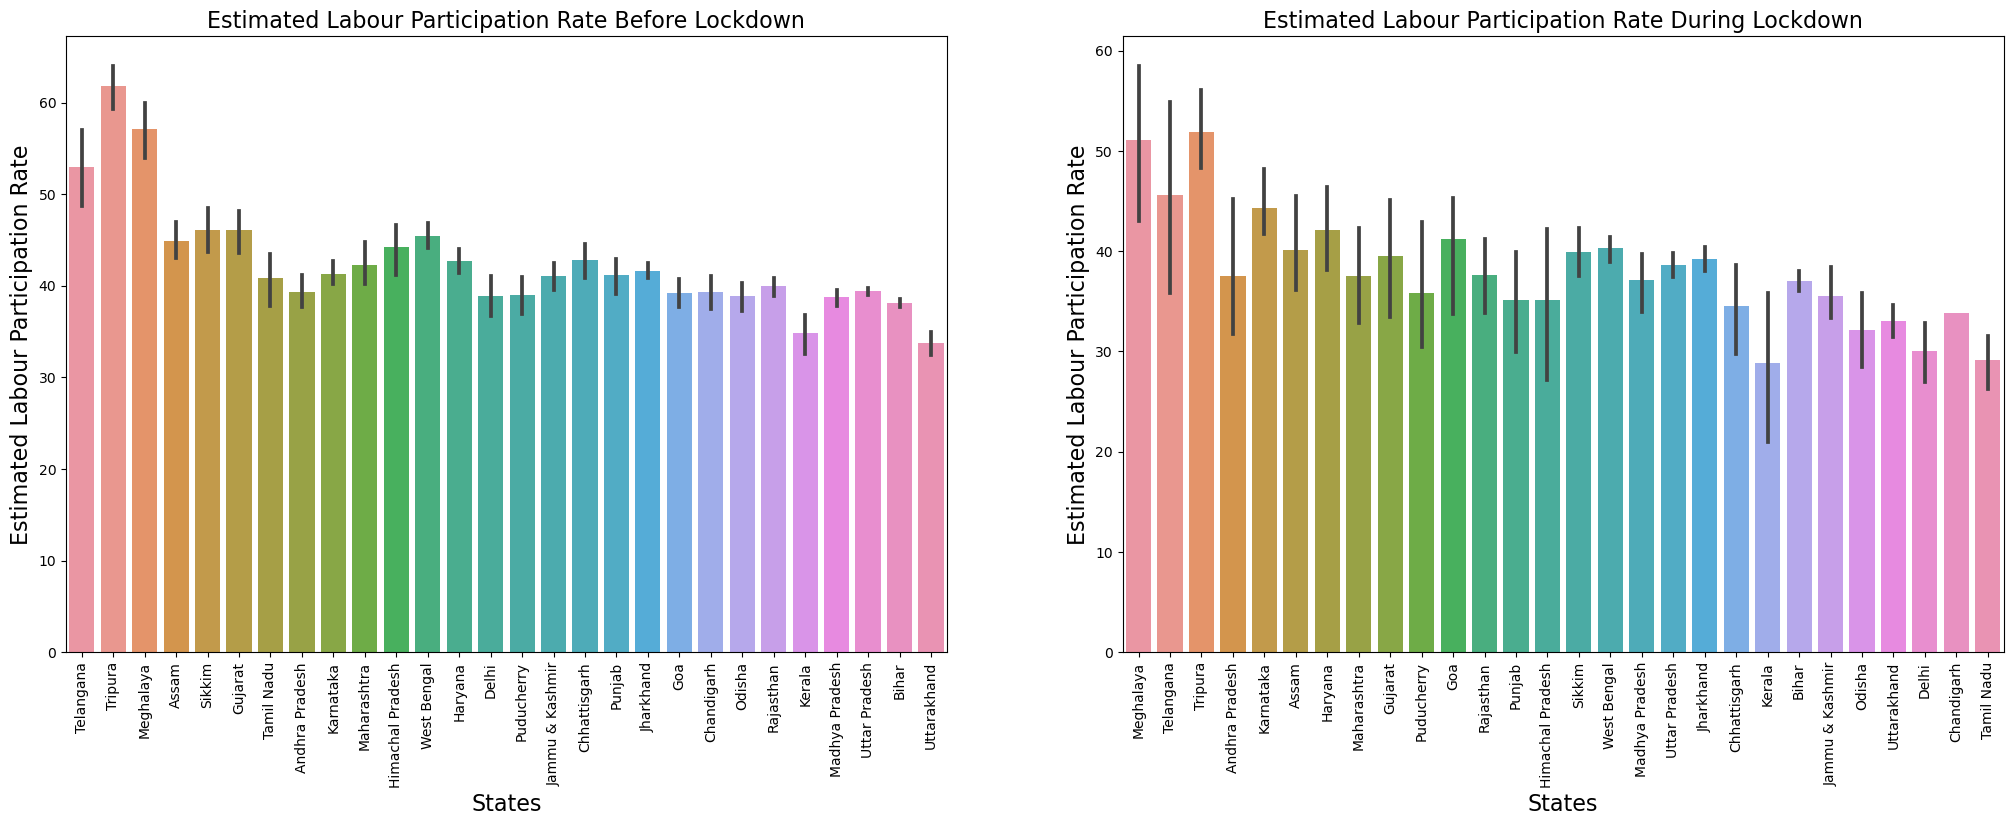

In [26]:
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

# Chart - 6 : Correlation Heatmap

In [28]:
# Create new DataFrames
df1_stats = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

df2_stats = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]
     

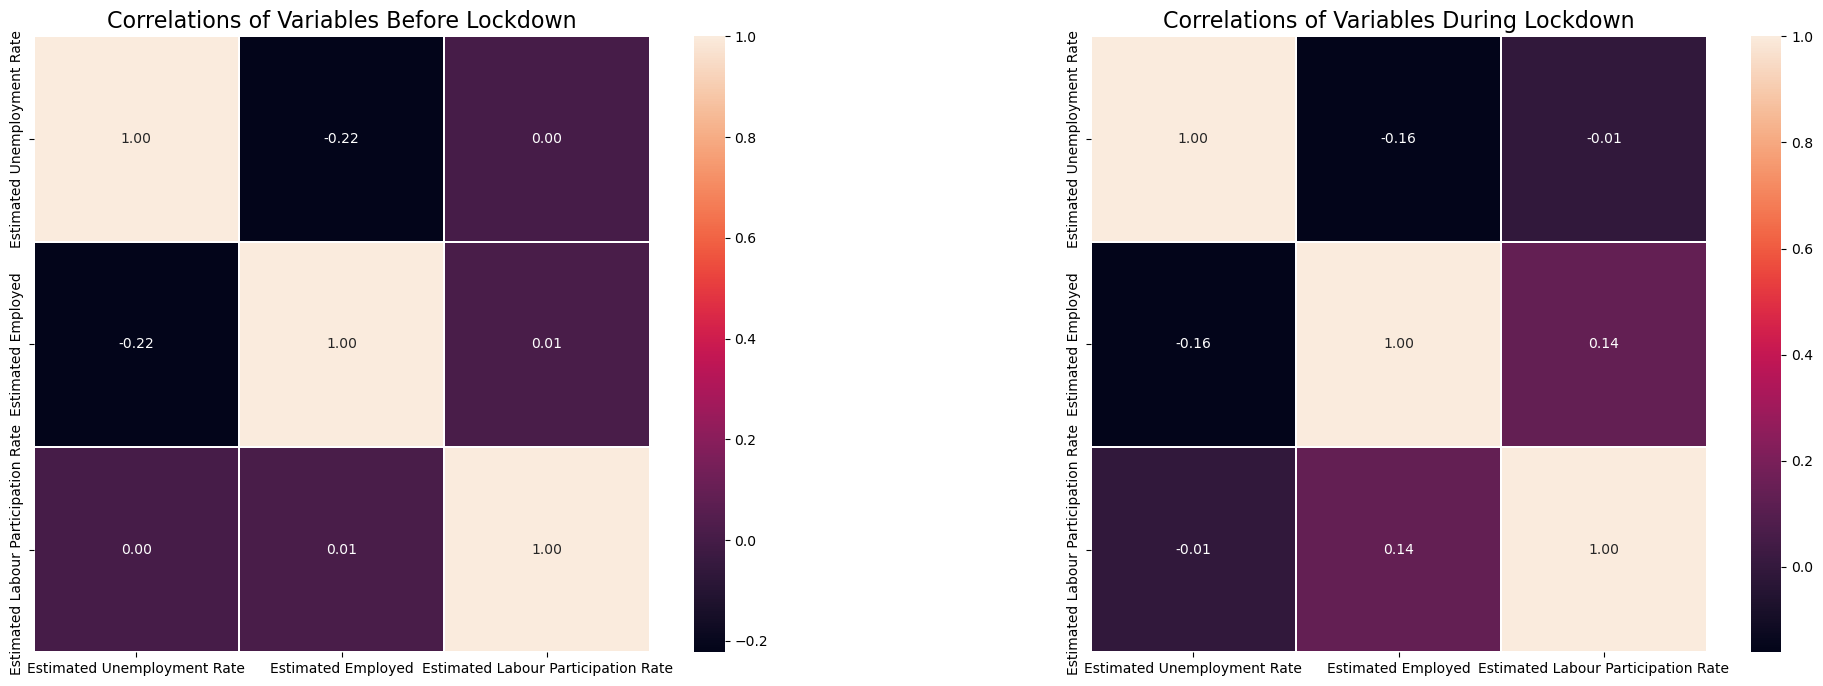

In [29]:
# Chart - 6 Correlation heatmap visualization code

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df1_stats.
sns.heatmap(df1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df2_stats.
sns.heatmap(df2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Display the subplots side by side.
plt.show()

# Conclusion
In these task we embarked on a comprehensive analysis of the unemployment rate, a critical economic indicator, with a particular focus on the unprecedented challenges brought about by the Covid-19 pandemic. Our exploratory data analysis yielded valuable insights that shed light on the dynamics of unemployment in India.

1.We observed a significant surge in the Estimated Unemployment Rate during the Covid-19 lockdown, underscoring the profound impact of the pandemic on the labor market.

2.Our state-wise analysis highlighted the states that bore the brunt of this crisis. Puducherry and Jharkhand stood out with the highest Estimated Unemployment Rates during the lockdown, while Haryana and Tripura held the top positions before the pandemic.

3.The transition from pre-lockdown to lockdown was marked by shifts in the states with the highest Estimated Unemployment Rates. Tripura, Haryana, and Himachal Pradesh led the rankings before the lockdown, whereas Puducherry, Jharkhand, and Bihar claimed the top spots during the lockdown.

4.Notably, states like Uttar Pradesh, Maharashtra, and West Bengal exhibited consistent challenges in maintaining high levels of Estimated Employed Workforce both before and during the lockdown.

5.Our analysis of Estimated Labour Participation Rate identified states that showed resilience in labor force participation. Telangana, Tripura, Meghalaya, and Assam topped the list before the lockdown, while Meghalaya, Telangana, Tripura, and Andhra Pradesh excelled during the lockdown.

6.We uncovered a robust negative correlation between Estimated Unemployment Rate and Estimated Employed, highlighting the intricate relationship between these two crucial employment indicators, both before and during the lockdown.